In [1]:
from pathlib import Path
from utils import *
from single_multiple_efficientNet import *
from engine import *
from data_transforms import create_transform
from dataloaders import *

change_to_disk()
data_dir = Path("Quality/data/new_data/split_1k")
models_path = Path('Quality/Models_double/')
check_dir(models_path)

In [2]:
image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]
BATCH_SIZE = 16

data_transform = create_transform(resize=resize, rotate=10, flip_h = True, color_dev=True, transf_tensor=True, normalize=True, sp_noise=True, gauss_noise=True)

train_dl, validation_dl, test_dl, train_data, validation_data, test_data = create_dataloaders_multilabel(data_dir, transform = data_transform, batch_size=BATCH_SIZE, num_workers= NUM_WORKERS)

In [3]:
NUM_EPOCHS = 100
device = get_device()

effnetb0 = EfficientNetB0()

loss_fn_binary = nn.CrossEntropyLoss()
loss_fn_multiclass = nn.CrossEntropyLoss()

In [4]:
# model_name = "EfficientNetB0"
# model_folder_path = models_path / model_name
# check_dir(model_folder_path)
# model_name_folder_path = model_folder_path / model_name

# #Train EfficientNet B0
# effnetb0.to(device)
# nadam_optim = torch.optim.NAdam(params=effnetb0.parameters())
# train_effnetb0_results, train_time_effnetb0 = train(effnetb0, train_dl, validation_dl, optimizer=nadam_optim, loss_fn_binary=loss_fn_binary, loss_fn_multiclass=loss_fn_multiclass, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

In [5]:
# eval_effnetb0_results = 0
# effnetb0_results = [train_effnetb0_results, train_time_effnetb0, eval_effnetb0_results]
# final_save(model_folder_path, model_name, NUM_EPOCHS, effnetb0, effnetb0_results)

In [6]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 42, device)
print("Done")

Done


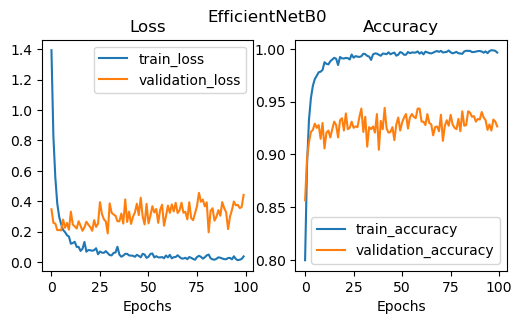

In [7]:
plot_loss_curves(effnetb0_results[0], "EfficientNetB0")

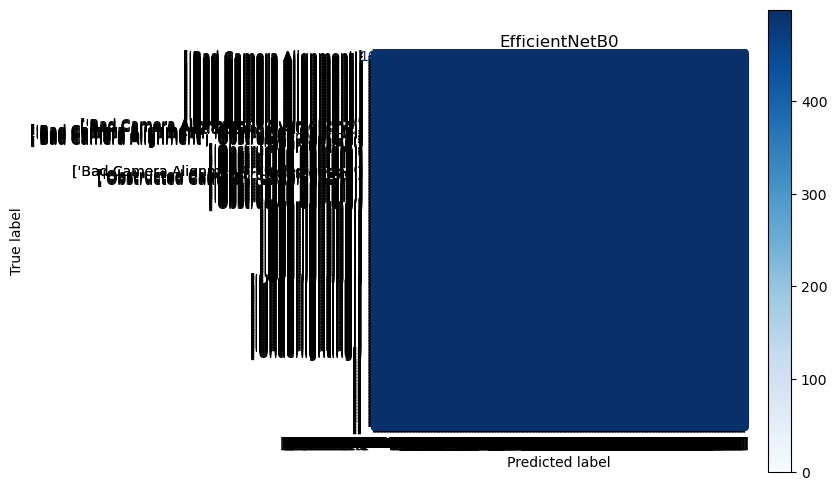

In [8]:
best_effnetb0_model.to(device)
plot_confusion_matrix(best_effnetb0_model,test_dl, device,test_data.classes,"EfficientNetB0")